In [3]:
import re 
import os
import json
import networkx as nx
import pandas as pd

In [4]:
# from src.extract_time.llama3_time_extract import llama3_time_extract

# time_extractor = llama3_time_extract()

In [5]:
# res = time_extractor("What is the bby sales from jan to jul 2023")
# res

In [6]:
# from datetime import datetime
# import calendar
# from dateutil.relativedelta import relativedelta

# # time_json = """{
# #   "statement": "What is the bby sales from jan to jul 2023",
# #   "dates": [
# #     {
# #       "date": null,
# #       "time": null,
# #       "period": ["January 2023", "July"],
# #       "frequency": null
# #     }
# #   ]
# # }"""

# def extract_date_conditions(time_json):
#     ### last week, last month, last year -> current data
#     ### if not given year -> max year in data
#     current_year = datetime.now().year

#     date_pat = r'"date": \[(.*)\]'
#     time_pat = r'"time": \[(.*)\]'
#     period_pat = r'"period": \[(.*)\]'
#     freq_pat = r'"frequency": \[(.*)\]'
#     months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
#     year_pat = r'\d{4}'
#     dates = re.search(date_pat, time_json)
#     time = re.search(time_pat, time_json)
#     period = re.search(period_pat, time_json)
#     freq = re.search(freq_pat, time_json)
#     start_date = end_date = None
#     if dates:
#         dates = dates.group(1)
#         dates = dates.split(",")
#         dates = [d.strip().strip('"') for d in dates]
        
#         dates = [datetime.strptime(date, r'%Y-%m-%d') for date in dates]
        
#         start_date = min(dates)
#         end_date = max(dates)
#     if time:
#         pass
#     if not start_date or not end_date:
#         if period:
#             period = period.group(1)
#             period = period.split(",")
#             if not len(period)> 2:   
#                 period = [p.strip().strip('"').strip() for p in period]
            
#             # Handle the case where only one item is provided
#             if len(period) == 1:
#                 # Parse the single date (either with month and year, or just month)
#                 try:
#                     date = datetime.strptime(period[0], "%B %Y")
#                 except ValueError:
#                     date = datetime.strptime(period[0], "%B")
#                     date = date.replace(year=current_year)  # Default to the current year

#                 # Start date is the 1st of the month
#                 start_date_p = date.replace(day=1)
#                 # End date is the last day of the month
#                 end_date_p = date.replace(day=calendar.monthrange(date.year, date.month)[1])

#             # Handle the case where two items are provided
#             elif len(period) == 2:
#                 # Parse the first item as the start date
#                 try:
#                     start_date_p = datetime.strptime(period[0], "%B %Y")
#                 except ValueError:
#                     start_date_p = datetime.strptime(period[0], "%B")
#                     start_date_p = start_date_p.replace(year=current_year)  # Default to the current year
#                 start_date_p = start_date_p.replace(day=1)  # Set the day as 1

#                 # Parse the second item as the end date
#                 try:
#                     end_date_p = datetime.strptime(period[1], "%B %Y")
#                 except ValueError:
#                     end_date_p = datetime.strptime(period[1], "%B")
#                     end_date_p = end_date_p.replace(year=current_year)  # Default to the current year
#                 # Set the end date as the last day of the month
#                 end_date_p = end_date_p.replace(day=calendar.monthrange(end_date_p.year, end_date_p.month)[1])
#             if start_date:
#                 start_date = min(start_date_p, start_date)
#             else:
#                 start_date = start_date_p
#             if end_date:
#                 end_date = max(end_date_p, end_date)
#             else:
#                 end_date = end_date_p
#     return start_date, end_date


In [7]:
# start_date, end_date = extract_date_conditions(res)

In [8]:
# start_date, end_date

In [9]:
from src.Utils.load_funcs import *
from src.gmd_utils.search_in_meta_data import *
from src.graph_utils.Graph_funcs import find_edge_attributes_with_indirect_connections
from src.query_data.query_exceptions import separate_exception_entities
from src.query_data.filters_and_aggregation_search import extract_comparisons, extract_aggregations, extract_top_or_bottom_n
from src.query_data.get_data_helper import filter_values_handler, comparison_handler, outer_join_all_columns
from src.query_data.get_data import fetch_required_data_and_apply_filters

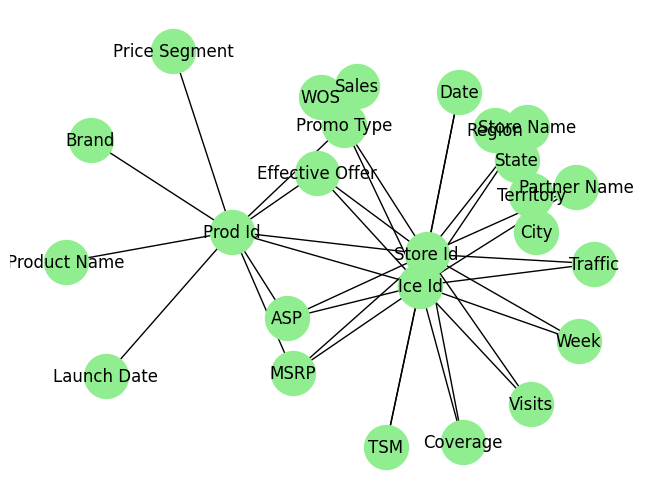

In [10]:
id_graph = load_graph('test_id_graph.gml')
pos = nx.kamada_kawai_layout(id_graph)  # Deterministic layout
nx.draw(id_graph, pos, with_labels=True, node_color='lightgreen', node_size=1000, font_size=12)

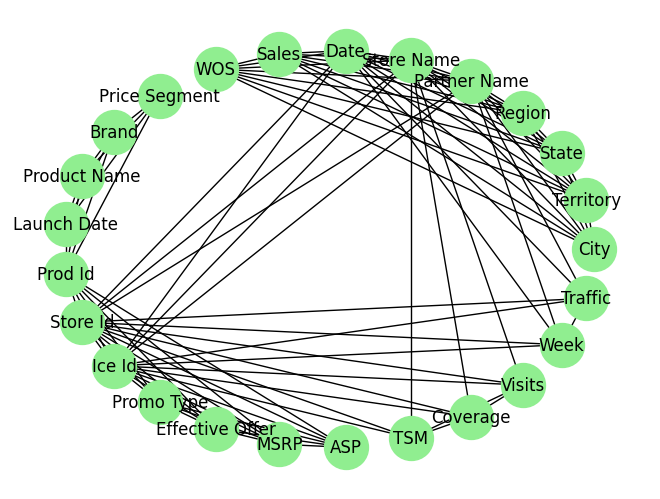

In [11]:
graph = load_graph()
pos = nx.circular_layout(graph)
nx.draw(graph, pos, with_labels=True, node_color='lightgreen', node_size=1000, font_size=12)

In [12]:
from src.Insight_logic.trigger_global_configs import Global_Checks

In [13]:
Global_Checks

{'Sales': {'thresholds': {'bestbuy': {'west': [7000, 500],
    'east': [7000, 100],
    'midwest': [7000, 100],
    'northeast': [7000, 100],
    'northwest': [7000, 100],
    'southeast': [7000, 100],
    'southwest': [7000, 100],
    'south': [7000, 100],
    'north': [7000, 100]},
   'walmart': {'west': [7000, 100],
    'east': [7000, 100],
    'midwest': [7000, 100],
    'northeast': [7000, 100],
    'northwest': [7000, 100],
    'southeast': [7000, 100],
    'southwest': [7000, 100],
    'south': [7000, 100],
    'north': [7000, 100]}},
  'Trigger Check Columns': {'Up': ['week of supply'], 'Down': ['Traffic']}},
 'Traffic': {'thresholds': {'bestbuy': {'west': [7000, 500],
    'east': [7000, 100],
    'midwest': [7000, 100],
    'northeast': [7000, 100],
    'northwest': [7000, 100],
    'southeast': [7000, 100],
    'southwest': [7000, 100],
    'south': [7000, 100],
    'north': [7000, 100]},
   'walmart': {'west': [7000, 100],
    'east': [7000, 100],
    'midwest': [7000, 100],

In [14]:
from src.Insight_logic.trigger_global_configs import Global_Checks

##Custom for now else can use company checks itself
to_be_checked = ['Sales']
available_cols_in_graph = list(graph.nodes)

company_checks = Global_Checks.copy()
for i in Global_Checks:
    if i in available_cols_in_graph:
        # trig_cols = []
        for j in Global_Checks[i]['Trigger Check Columns']:
            cols_present = list(set(Global_Checks[i]['Trigger Check Columns'][j]) & set(available_cols_in_graph))
            if len(cols_present) > 0:
                company_checks[i]['Trigger Check Columns'][j] = cols_present
        # new_trig_check = {}
        # for j in cols_present:
        #     new_trig_check[j] = Global_Checks[i]['Trigger Check Columns'][j]
        # company_checks[i]['Trigger Check Columns'] = new_trig_check


In [15]:
# with open('company_checks.json', 'w') as fp:
#     json.dump(company_checks, fp)

In [16]:
company_checks

{'Sales': {'thresholds': {'bestbuy': {'west': [7000, 500],
    'east': [7000, 100],
    'midwest': [7000, 100],
    'northeast': [7000, 100],
    'northwest': [7000, 100],
    'southeast': [7000, 100],
    'southwest': [7000, 100],
    'south': [7000, 100],
    'north': [7000, 100]},
   'walmart': {'west': [7000, 100],
    'east': [7000, 100],
    'midwest': [7000, 100],
    'northeast': [7000, 100],
    'northwest': [7000, 100],
    'southeast': [7000, 100],
    'southwest': [7000, 100],
    'south': [7000, 100],
    'north': [7000, 100]}},
  'Trigger Check Columns': {'Up': ['week of supply'], 'Down': ['Traffic']}},
 'Traffic': {'thresholds': {'bestbuy': {'west': [7000, 500],
    'east': [7000, 100],
    'midwest': [7000, 100],
    'northeast': [7000, 100],
    'northwest': [7000, 100],
    'southeast': [7000, 100],
    'southwest': [7000, 100],
    'south': [7000, 100],
    'north': [7000, 100]},
   'walmart': {'west': [7000, 100],
    'east': [7000, 100],
    'midwest': [7000, 100],

In [17]:
to_be_checked

['Sales']

In [18]:
meta_data = load_meta_data()
meta_data['dimensions']['City']

{'regexes': ['city'],
 'Unique Values': ['Conklin',
  'Dougherty',
  'Hepler',
  'Lowry City',
  'Mode',
  'Scribner',
  'Searsboro',
  'Sturgeon Lake',
  'Volin',
  'Vulcan',
  'Cylinder',
  'Fortville',
  'Glen Ellyn',
  'Lublin',
  'North Royalton',
  'Pilot Mound',
  'Pleasant Plain',
  'Saint Bonifacius',
  'Trimont',
  'Villa Park',
  'Amesville',
  'Beverly Shores',
  'Champion',
  'Darfur',
  'Drayton',
  'Gilman',
  'Hollansburg',
  'Swaledale',
  'Thompsonville',
  'Twin Valley',
  'Cherryville',
  'Davey',
  'Frazee',
  'Granville',
  'Houghton Lake',
  'Humphrey',
  'Ida Grove',
  'Kiel',
  'Pearl',
  'Whiting',
  'Bannister',
  'Grayridge',
  'Lafayette',
  'Lidgerwood',
  'Pennington',
  'Richland',
  'Roseland',
  'Stanton',
  'Stout',
  'Vickery',
  'Burnt Cabins',
  'East Norwich',
  'Goshen',
  'Irvington',
  'Marathon',
  'Marsteller',
  'North Adams',
  'Portland',
  'Rooseveltown',
  'Waterport',
  'Bethlehem',
  'Davenport',
  'East Elmhurst',
  'Forbes Road',
  '

In [19]:
meta_data['dimensions']['Partner Name']

{'regexes': ['partner', 'partner name'],
 'Unique Values': ['Amazon', 'Bestbuy', 'Costco', 'Target', 'Walmart'],
 'GMD Name': 'Partner'}

In [20]:
meta_data.keys()

dict_keys(['metric', 'dimensions', 'Location Cols'])

In [21]:
# user_input = 'all sales except bestbuy and amazon in west region'
# user_input ='What are the bestbuy sales in west region covered vs uncovered'
user_input = 'show me the product name'
# user_input = 'which bestbuy store name have sales greater than 1000'
# user_input = 'which bestbuy store name have sales equal to 95735'
# user_input = 'give me names of tsm that are covered'
# user_input = 'show tsm visits in west region'
# user_input = 'Give me Top 3 sales less than or equal to 95735 for all partner'
# user_input = 'what are (Best buy,Croton On Hudson,Westchester,New York,US) sales'
# user_input = 'what are bestbuy price segment sales by partner'print(res)
# user_input = 'What are the best buy sales that are covered by coverage?' print(res)

In [22]:
metric_list = fetch_for_metric(user_input)
metric_list

{}

In [23]:
dimension_data, dimension_values = fetch_for_specific_dimension(user_input)
dimension_data, dimension_values

({}, [])

In [24]:
dimension_list = fetch_for_dimension_name(user_input)
dimension_list

{'Product Name': ['product name']}

In [25]:
# ###Time extraction
# time_res = time_extractor(user_input)

# print(time_res)

In [26]:
# start_date, end_date = extract_date_conditions(time_res)

# print(start_date, end_date)

In [27]:
# date_node = []
# if start_date:
#     date_node.append('Date')

In [28]:
list_of_nodes = list(set(list(metric_list.keys()) + list(dimension_list.keys()) + list(dimension_data.keys())))
list_of_nodes

['Product Name']

In [29]:
find_edge_attributes_with_indirect_connections(id_graph, list_of_nodes)

['Product_data_dummy.csv']

In [30]:
list_of_paths = find_edge_attributes_with_indirect_connections(graph, list_of_nodes)
list_of_paths

['Product_data_dummy.csv']

In [31]:
exclusions, inclusions = separate_exception_entities(user_input, dimension_values)
col_w_regex = {key: metric_list.get(key, []) + dimension_list.get(key, []) for key in metric_list.keys() | dimension_list.keys()}

aggregations = extract_aggregations(user_input, col_w_regex)
comparisons = extract_comparisons(user_input, col_w_regex)


In [32]:
list_to_groupby = []

#Value filter according to dimension values

if dimension_list:
    list_to_groupby+= dimension_list

#Comparison filter
after_comp =[]
before_comp = []

if aggregations:
    #Assumption: if an entity say sales is asked in query then it is only asked like  sales >/</= 5000 or avg/agg sales </>/= 5000
    # not like avg sales where sales are greater than 5000 
    for comp in comparisons:
        if comp[0] in aggregations:
            after_comp.append(comp)
        else:
            before_comp.append(comp)
    
else:
    before_comp = comparisons

In [348]:
def outer_join_all_columns(dfs):
    
    # Start with the first DataFrame
    result = dfs[0]
    result = result.groupby([col for col in result.columns if col not in result.select_dtypes(include=[int, float]) \
                    .columns.difference(result.select_dtypes(include=['datetime', 'object', 'string']).columns)]).sum().reset_index()
    
    # Iterate over the remaining DataFrames
    for df in dfs[1:]:
        # Find common columns between the current result and the next DataFrame
        common_columns = list(set(result.columns).intersection(set(df.columns)))
        print(common_columns)        
        numeric_columns = df.select_dtypes(include=[int, float]) \
                    .columns.difference(df.select_dtypes(include=['datetime', 'object', 'string']).columns)
    
        # If there are common columns, merge on those
        if common_columns:
            #columns that are not numeric need to be grouped
            grp_by_cols = [ col for col in df.columns if col not in numeric_columns]
            
            # print(grp_by_cols)
            df = df.groupby(grp_by_cols).sum().reset_index()
            # print(df)
            # print(result)
            
            result = pd.merge(result, df, on=common_columns, how='outer')
        else:
            # If no common columns, do a cartesian product to keep all data
            result = result.merge(df, left_index=True, right_index=True, how='outer')
    warning = None
    if len(result)>max([len(df) for df in dfs]):
        warning = 'Warning: the data may not have been joined correctly as the number of rows in the result is more than the number of rows in the original dataframes which may lead to incorrect calculations.'

    return result, warning


In [349]:
# import numpy as np
# df1 = pd.DataFrame({'Store ID': [np.nan,'b', 'c', 'd'], 'region': [np.nan, 'east', 'west', 'west'], 'sales': [1,2,3,4], 'Coverage': ['c', 'u', 'c', 'u']})
# df2 = pd.DataFrame({'Store ID': ['a','b', 'c', 'd'], 'region': ['north', 'north', 'west', 'west'], 'wos': [1,2,3,4], 'Coverage': ['c', 'u', 'c', 'u'] })
# # df3 = pd.DataFrame({'Store ID': ['a','b', 'partner': ['east', 'east',], 'wos': [5,6,7,8], 'Coverage': ['c', 'u', 'c', 'c'] })
# outer_join_all_columns([df1, df2])


In [350]:
list_of_nodes

['Sales', 'Region']

In [351]:
from src.Utils.Config import DATA_FOLDER

dfs = [pd.read_csv(os.path.join('src/', DATA_FOLDER, file_name)) for file_name in list_of_paths]

#Outerjoin on common columns
df, _ = outer_join_all_columns(dfs)
df

# # Start with the first DataFrame
# merged_df = dfs[0]
# print(merged_df)
# # Outer join with the rest of the DataFrames
# for df in dfs[1:]:
#     merged_df = pd.merge(merged_df, df, how='outer')
#     print(merged_df)

# merged_df

,City,Territory,State,Region,Partner Name,Store Name,Date,Sales,WOS
0,Alberton,Mineral,Montana,West,Target,"Target,Alberton,Mineral,Montana,US",2024-01-01,209,706
1,Alberton,Mineral,Montana,West,Target,"Target,Alberton,Mineral,Montana,US",2024-02-01,214,661
2,Alberton,Mineral,Montana,West,Target,"Target,Alberton,Mineral,Montana,US",2024-03-01,223,548
3,Alberton,Mineral,Montana,West,Target,"Target,Alberton,Mineral,Montana,US",2024-04-01,277,518
4,Alberton,Mineral,Montana,West,Target,"Target,Alberton,Mineral,Montana,US",2024-05-01,722,291
...,...,...,...,...,...,...,...,...,...
1195,Winthrop,Suffolk,Massachusetts,West,Target,"Target,Winthrop,Suffolk,Massachusetts,US",2024-02-01,374,772
1196,Winthrop,Suffolk,Massachusetts,West,Target,"Target,Winthrop,Suffolk,Massachusetts,US",2024-03-01,495,731
1197,Winthrop,Suffolk,Massachusetts,West,Target,"Target,Winthrop,Suffolk,Massachusetts,US",2024-04-01,516,623
1198,Winthrop,Suffolk,Massachusetts,West,Target,"Target,Winthrop,Suffolk,Massachusetts,US",2024-05-01,539,559


In [33]:
i_df, df, after_comp, aggregations, list_to_groupby = fetch_required_data_and_apply_filters(list_of_paths, user_input, metric_list, dimension_values, dimension_list)
df

,Price Segment,Brand,Product Name,Launch Date,Prod Id
0,Budget Friendly Segment,Asus,Asus Zenbook,2024-06-18,1
1,Budget Friendly Segment,Asus,Asus TUF Gaming,2022-06-20,2
2,Premium_segment,HP,HP Envy x360,2023-01-15,3
3,Premium_segment,Samsung,Samsung Galaxybook,2021-03-28,4
4,Premium_segment,Microsoft,Microsoft Surface Pro,2024-06-01,5
5,Premium_segment,Apple,Apple Macbook Pro,2024-05-12,6
6,Budget Friendly Segment,Lenovo,Lenovo Legion,2021-06-12,7
7,Budget Friendly Segment,Lenovo,Lenovo Yoga,2023-04-29,8
8,Budget Friendly Segment,Acer,Acer Aspire,2024-02-04,9


In [34]:
df

,Price Segment,Brand,Product Name,Launch Date,Prod Id
0,Budget Friendly Segment,Asus,Asus Zenbook,2024-06-18,1
1,Budget Friendly Segment,Asus,Asus TUF Gaming,2022-06-20,2
2,Premium_segment,HP,HP Envy x360,2023-01-15,3
3,Premium_segment,Samsung,Samsung Galaxybook,2021-03-28,4
4,Premium_segment,Microsoft,Microsoft Surface Pro,2024-06-01,5
5,Premium_segment,Apple,Apple Macbook Pro,2024-05-12,6
6,Budget Friendly Segment,Lenovo,Lenovo Legion,2021-06-12,7
7,Budget Friendly Segment,Lenovo,Lenovo Yoga,2023-04-29,8
8,Budget Friendly Segment,Acer,Acer Aspire,2024-02-04,9


In [35]:
if dimension_data:
        exclusions, inclusions = separate_exception_entities(user_input, dimension_values)
        df = filter_values_handler(dimension_data, inclusions, exclusions, df)
        df = df.reset_index(drop=True)
        list_to_groupby += list(dimension_data.keys())
df

,Price Segment,Brand,Product Name,Launch Date,Prod Id
0,Budget Friendly Segment,Asus,Asus Zenbook,2024-06-18,1
1,Budget Friendly Segment,Asus,Asus TUF Gaming,2022-06-20,2
2,Premium_segment,HP,HP Envy x360,2023-01-15,3
3,Premium_segment,Samsung,Samsung Galaxybook,2021-03-28,4
4,Premium_segment,Microsoft,Microsoft Surface Pro,2024-06-01,5
5,Premium_segment,Apple,Apple Macbook Pro,2024-05-12,6
6,Budget Friendly Segment,Lenovo,Lenovo Legion,2021-06-12,7
7,Budget Friendly Segment,Lenovo,Lenovo Yoga,2023-04-29,8
8,Budget Friendly Segment,Acer,Acer Aspire,2024-02-04,9


In [36]:
after_comp

[]

In [37]:
aggregations

{}

In [38]:
resdf = df.copy()

In [39]:
df = df[list_of_nodes]
df

,Product Name
0,Asus Zenbook
1,Asus TUF Gaming
2,HP Envy x360
3,Samsung Galaxybook
4,Microsoft Surface Pro
5,Apple Macbook Pro
6,Lenovo Legion
7,Lenovo Yoga
8,Acer Aspire


# If trig check

In [359]:
def find_partial_edge_attributes(graph, nodes):
    edge_attributes = []
    visited_nodes = set()

    for master_node in nodes:
        if master_node in visited_nodes:
            continue

        # Attempt to find all nodes connected to the master_node
        connected_subgraph = nx.node_connected_component(graph, master_node)
        connected_nodes = set(connected_subgraph).intersection(nodes)

        # If connected nodes are found, gather their edge attributes
        if connected_nodes:
            visited_nodes.update(connected_nodes)

            for target in connected_nodes:
                if graph.has_edge(master_node, target):
                    attrs = graph.get_edge_data(master_node, target)
                    edge_attributes.append(attrs['file_names'])
                else:
                    try:
                        path = nx.shortest_path(graph, source=master_node, target=target)
                        if all(node in graph.nodes for node in path):
                            for i in range(len(path) - 1):
                                edge = graph.get_edge_data(path[i], path[i + 1])
                                edge_attributes.append(edge['file_names'])
                    except nx.NetworkXNoPath:
                        continue

    return edge_attributes


In [360]:
df

,Sales,Region
0,359,West
1,368,West
2,614,West
3,641,West
4,667,West
...,...,...
295,564,West
296,593,West
297,681,West
298,684,West


In [361]:
# import itertools
# columns_list= ['Region', 'Partner Name']
# # Loop through the unique combinations of column values
# for combination in itertools.product(*(df[col].unique() for col in columns_list)):
#     print(combination)

In [362]:
#Sales logic.py
import pandas as pd
from src.Insight_logic.trigger_global_configs import Global_Checks
import itertools
####################ASSUMPTION: Period is same for all region and partner combination
def get_suggestions(resdf, graph, metric, user_input, list_of_nodes, metric_list, dimension_values, dimension_data, dimension_list, list_of_columns_to_be_present_for_trigger_check, list_of_column_checks, filters = {} ):
    responses = []
    
    ##1. Retrieve data from resdf or graph 
    ## 1.1 Check if all columns present in resdf
    cols_present_in_resdf = {val['GMD Name'] : key for key, val in meta_data['dimensions'].items() if (val['GMD Name'] in list_of_columns_to_be_present_for_trigger_check and key in resdf)}
    ## 1.2 remaining columns need to be retrieved
    cols_not_present_in_resdf = list(set(list_of_columns_to_be_present_for_trigger_check) - set(cols_present_in_resdf.keys()))
    
    ## 1.3 if some columns needed for trigger check not present in resdf, retrieve data from graph
    if cols_not_present_in_resdf:
        
        #check if these cols are in meta data i.e. implying their availability in graph, as metadata stores only columns present in graph
        nodes = [key for key, val in meta_data['dimensions'].items() if (val['GMD Name'] in cols_not_present_in_resdf)]

        # if any required columns are not present in graph, return no suggestions as trigger check cannot be performed, TODO: Theta checking
        if len(nodes) < len(cols_not_present_in_resdf):
            still_not_present = cols_not_present_in_resdf - set(nodes)
            op = ', '.join(still_not_present)
            return {0:{'Suggestion': f'Please provide {op} columns data in your files to get more valuable insights related to Sales', 'Filter Variables': None}}
        
        # Retrieve files such that all required columns are present
        list_of_paths = find_edge_attributes_with_indirect_connections(graph, nodes+list_of_nodes)

        # if there is no possible files that when merged together have all required columns, return no suggestions TODO: Theta checking
        if not list_of_paths:
            return {0:{'Suggestion': f'Please link Region or Partner type columns with Sales in your files to get more valuable insights related to Sales', 'Filter Variables': None}}
        
        # if there are possible files that when merged together have all required columns, fetch required data and apply filters similar to specified in user query 
        _, temp_df, _, _, _ = fetch_required_data_and_apply_filters(list_of_paths, user_input, metric_list, dimension_values, dimension_list)
        
        if dimension_data:
            exclusions, inclusions = separate_exception_entities(user_input, dimension_values)
            temp_df = filter_values_handler(dimension_data, inclusions, exclusions, temp_df)
            temp_df = temp_df.reset_index(drop=True)
        print(temp_df)
        
    else:
        # if all columns present in resdf, use resdf itself as it has already required columns
        temp_df = resdf.copy()
    
    ## Not used for primary suggestions, but instead used when user clicks on a suggestion and we need to dchek respective different columns for threshold 
    ## It is used for trigger column checks only, when a user clicks on a suggestion, we get filters for each column in that suggestion
    ## for example: bestbuy sales in west region, filters = {'Region': 'west', 'Partner Name': 'Bestbuy'} if we find a pattern in sales in west region for bestbuy and user is interested in that
    ## This will help us ensure checking for related trigger metric/dimension checks in those speciifc filters that user is interested in 
    ## Example trigger columns: WOS, Traffic for Sales based on whether sales goes up or down
    if filters:
        mask = pd.Series(True, index=temp_df.index)
        for col, value in filters.items():
            mask &= temp_df[col].isin(value)
            # mask &= temp_df[col] == value
        temp_df = temp_df[mask]
    
    # 2. Apply threshold

    temp_df = temp_df.reset_index()
    
    # 2.1 Get column names from given metric name from gmd, NOTE: metric name is GMD name always here
    metric_col = {key:val['GMD Name'] for key, val in meta_data['metric'].items() if val['GMD Name'] == metric and key in temp_df}
    
    # 2.2 Get column names from GMD names from list of columns that need to be checked for given metric
    cols = {val['GMD Name'] : key for key, val in meta_data['dimensions'].items() if (val['GMD Name'] in list_of_column_checks and key in temp_df)}
    cols = [cols[val] for val in list_of_column_checks if val in cols]
    

    # TODO- check if Date is monthly or on what granularity and convert to monthly or yearly based on threhold granularity
    ## assume threshold granularity is monthly
    cols2 = {val['GMD Name'] : key for key, val in meta_data['dimensions'].items() if (val['GMD Name'] in list_of_columns_to_be_present_for_trigger_check and key in temp_df)}
    cols2 = [cols2[val] for val in list_of_columns_to_be_present_for_trigger_check if val in cols2]
    
    # Currently just to accomodate if we have more than one metric cols in resdf, which is generated from user query i.e. when user is querying for sales for laptop and mobile at same time
    for met, gmd_name in metric_col.items():
        temp_df2 = temp_df[list(cols2)+[met]]
        temp_df2 = temp_df2.groupby(cols2).sum().reset_index()
        print(temp_df2)
        
        # 2.3 Take all possible combinations of the columns that need to be checked for given metric from 
        for combination in itertools.product(*(temp_df2[col].unique() for col in cols)):
            
            threshold = Global_Checks[gmd_name]['thresholds']
            #dig for threshold
            try:
                for filter_var in combination:
                
                    threshold = threshold[filter_var.lower()]
            except KeyError:
                print(f'No threshold found for {combination}')
                continue    

            #Mask to get data that satisfies given combination
            mask = pd.Series(True, index=temp_df2.index)
            
            for col, value in zip(cols, combination):
                mask &= temp_df2[col] == value
                        
            ## IF threshold doesn't exist for given partner and region, then continue
            postive_thre_reaching_vals = temp_df2[(temp_df2[met] >= threshold[0]) & mask]
            negative_thre_reaching_vals = temp_df2[(temp_df2[met] <= threshold[1]) & mask]
            if not postive_thre_reaching_vals.empty and not negative_thre_reaching_vals.empty:
                pass
            elif not postive_thre_reaching_vals.empty:
                responses.append({'Suggestion': f'Found {met} pattern for {combination}, please click here to get more info', 'Filters Info': {'Trend':'Up', 'Metric': met, 'Filter_Variables' :{k:[v] for k,v in zip(cols, combination)}, 'Associated df':postive_thre_reaching_vals}})
            elif not negative_thre_reaching_vals.empty:
                responses.append({'Suggestion': f'Found {met} pattern for {combination}, please click here to get more info', 'Filters Info': {'Trend':'Down', 'Metric': met, 'Filter_Variables' :{k:[v] for k,v in zip(cols, combination)}, 'Associated df':negative_thre_reaching_vals}})
    
    return {index: value for index, value in enumerate(responses)}

In [363]:
# below list in same order as in threshold file
list_of_columns_to_be_present_for_trigger_check = ['Partner', 'Location 2', 'Date']
list_of_column_checks = ['Partner', 'Location 2']

#if sales is in metric_list i.e. user is querying regarding sales main.py
if any([key for key, val in meta_data['metric'].items() if val['GMD Name'] == 'Sales' and key in metric_list]):
    suggestions = get_suggestions(resdf, graph, 'Sales', user_input, list_of_nodes, metric_list, dimension_values, dimension_data, dimension_list, list_of_columns_to_be_present_for_trigger_check, list_of_column_checks)
if any([key for key, val in meta_data['metric'].items() if val['GMD Name'] == 'Traffic' and key in metric_list]):
    suggestions = get_suggestions(resdf, graph, 'Traffic', user_input, list_of_nodes, metric_list, dimension_values, dimension_data, dimension_list, list_of_columns_to_be_present_for_trigger_check, list_of_column_checks)
if any([key for key, val in meta_data['metric'].items() if val['GMD Name'] == 'week of supply' and key in metric_list]):
    suggestions = get_suggestions(resdf, graph, 'week of supply', user_input, list_of_nodes, metric_list, dimension_values, dimension_data, dimension_list, list_of_columns_to_be_present_for_trigger_check, list_of_column_checks)

suggestions

   Partner Name Region        Date  Sales
0        Amazon   West  2024-01-01   2852
1        Amazon   West  2024-02-01   3456
2        Amazon   West  2024-03-01   4136
3        Amazon   West  2024-04-01   4783
4        Amazon   West  2024-05-01   5400
5        Amazon   West  2024-06-01   6006
6       Bestbuy   West  2024-01-01   2705
7       Bestbuy   West  2024-02-01   3598
8       Bestbuy   West  2024-03-01   4841
9       Bestbuy   West  2024-04-01   5717
10      Bestbuy   West  2024-05-01   6941
11      Bestbuy   West  2024-06-01   7431
12       Costco   West  2024-01-01   3228
13       Costco   West  2024-02-01   3818
14       Costco   West  2024-03-01   4667
15       Costco   West  2024-04-01   5321
16       Costco   West  2024-05-01   6269
17       Costco   West  2024-06-01   7363
18       Target   West  2024-01-01   2844
19       Target   West  2024-02-01   3849
20       Target   West  2024-03-01   4421
21       Target   West  2024-04-01   5362
22       Target   West  2024-05-01

{0: {'Suggestion': "Found Sales pattern for ('Bestbuy', 'West'), please click here to get more info",
  'Filters Info': {'Trend': 'Up',
   'Metric': 'Sales',
   'Filter_Variables': {'Partner Name': ['Bestbuy'], 'Region': ['West']},
   'Associated df':    Partner Name Region        Date  Sales
   11      Bestbuy   West  2024-06-01   7431}},
 1: {'Suggestion': "Found Sales pattern for ('Walmart', 'West'), please click here to get more info",
  'Filters Info': {'Trend': 'Up',
   'Metric': 'Sales',
   'Filter_Variables': {'Partner Name': ['Walmart'], 'Region': ['West']},
   'Associated df':    Partner Name Region        Date  Sales
   29      Walmart   West  2024-06-01   7455}}}

if no suggestion we check for theta thresholds

In [283]:
resdf[(resdf['Region']=='Midwest') & (resdf['Partner Name']=='Bestbuy')][['Region', 'Partner Name', 'Date', 'Sales']].groupby(['Region', 'Partner Name', 'Date']).sum()

,,,Sales
Region,Partner Name,Date,


## Theta checking if not threshold match_found

In [48]:
suggestions = [{'Suggestion': "Test Not found",  'Filters Info': None}]

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


list_of_columns_to_be_present_for_trigger_check = ['Partner', 'Location 2', 'Date']
list_of_column_checks = ['Partner', 'Location 2']
theta_thresholds = {
    'Monthly': [60,30, 10],
    'Weekly': [60,30, 10],
    'Daily': [60,30, 10]
    
}


def min_max_scale(df_list_of_values):
    return (df_list_of_values - np.min(df_list_of_values)) / (np.max(df_list_of_values) - np.min(df_list_of_values))

def angle_check(theta, theta_thresholds):
    if theta>=theta_thresholds[0]:
        return 0    ##Large shift
    if theta < theta_thresholds[0] and theta >=theta_thresholds[1]:
        return 1    ##  possibility of medium shift if this continues for 3 continous points
    if theta < theta_thresholds[1] and theta >= theta_thresholds[2]:
        return 2    ## possibility of small shift if this continues for 6 continous points
    return None

def pattern_recognition_theta(thetas, ranges, freq):

    large_shift = []
    medium_shift = []
    small_shift = []
    
    # fill_angle_shifts = [large_shift, medium_shift_temp, small_shift_temp]
    #while True
    for index in range(len(thetas)):
        theta = thetas[index]
        ran = ranges[index]
        angle_check_value = angle_check(theta, theta_thresholds[freq])

        if not angle_check_value:
            continue
        if angle_check_value == 0:
            large_shift.append(ran)

        if angle_check_value == 1:
            if not (index+2 < len(thetas)):
                continue
            avg_theta_3_above = (thetas[index+2] + thetas[index+1] + thetas[index])/3

            if angle_check(avg_theta_3_above, theta_thresholds[freq]) == 1:
                medium_shift.append([ran[0], ranges[index+2][1]])
        
            
        if angle_check_value == 2:
            if not (index+5 < len(thetas)):
                continue
            avg_theta_6_above = (thetas[index+5] + thetas[index+4] + thetas[index+3] + thetas[index+2] + thetas[index+1] + thetas[index])/6
            if angle_check(avg_theta_6_above, theta_thresholds[freq]) == 2:
                small_shift.append([ran[0], ranges[index+5][1]])

    return large_shift, medium_shift, small_shift

        
def do_theta_threshold_checks(metric, list_of_columns_to_be_present_for_trigger_check, list_of_column_checks, resdf, ):

    ##1. Retrieve data from resdf or graph 
    ## 1.1 Check if all columns present in resdf
    cols_present_in_resdf = {val['GMD Name'] : key for key, val in meta_data['dimensions'].items() if (val['GMD Name'] in list_of_columns_to_be_present_for_trigger_check and key in resdf)}
    ## 1.2 remaining columns need to be retrieved
    cols_not_present_in_resdf = list(set(list_of_columns_to_be_present_for_trigger_check) - set(cols_present_in_resdf.keys()))
    
    ## 1.3 if some columns needed for trigger check not present in resdf, retrieve data from graph
    if cols_not_present_in_resdf:
        
        #check if these cols are in meta data i.e. implying their availability in graph, as metadata stores only columns present in graph
        nodes = [key for key, val in meta_data['dimensions'].items() if (val['GMD Name'] in cols_not_present_in_resdf)]

        # if any required columns are not present in graph, return no suggestions as trigger check cannot be performed, TODO: Theta checking
        if len(nodes) < len(cols_not_present_in_resdf):
            still_not_present = cols_not_present_in_resdf - set(nodes)
            return [{'Suggestion': f'Please provide {', '.join(still_not_present)} columns data in your files to get more valuable insights related to Sales', 'Filter Variables': None}]
        
        # Retrieve files such that all required columns are present
        list_of_paths = find_edge_attributes_with_indirect_connections(graph, nodes+list_of_nodes)

        # if there is no possible files that when merged together have all required columns, return no suggestions TODO: Theta checking
        if not list_of_paths:
            return [{'Suggestion': f'Please link Region or Partner type columns with Sales in your files to get more valuable insights related to Sales', 'Filter Variables': None}]
        
        # if there are possible files that when merged together have all required columns, fetch required data and apply filters similar to specified in user query 
        temp_df, _, _, _ = fetch_required_data_and_apply_filters(list_of_paths, user_input, metric_list, dimension_values, dimension_list)

    else:
        # if all columns present in resdf, use resdf itself as it has already required columns
        temp_df = resdf.copy()

    # 2.1 Get column names from given metric name from gmd, NOTE: metric name is GMD name always here
    metric_col = {key:val['GMD Name'] for key, val in meta_data['metric'].items() if val['GMD Name'] == metric and key in resdf}

    # 2.2 Get column names from GMD names from list of columns that need to be checked for given metric
    cols = {val['GMD Name'] : key for key, val in meta_data['dimensions'].items() if (val['GMD Name'] in list_of_columns_to_be_present_for_trigger_check and key in temp_df)}
    date_col = [val['GMD Name'] for val in meta_data['dimensions'].values() if val['GMD Name'] == 'Date'][0]
    cols = [cols[val] for val in list_of_columns_to_be_present_for_trigger_check if val in cols]
    cols2 = {val['GMD Name'] : key for key, val in meta_data['dimensions'].items() if (val['GMD Name'] in list_of_column_checks and key in temp_df)}
    cols2 = [cols2[val] for val in list_of_column_checks if val in cols2]
    
    # Currently just to accomodate if we have more than one metric cols in resdf, which is generated from user query i.e. when user is querying for sales for laptop and mobile at same time
    for met, gmd_name in metric_col.items():
        temp_df2 = temp_df[list(cols)+[met]]
        temp_df2 = temp_df2.groupby(cols).sum().reset_index()
        # 2.3 Take all possible combinations of the columns that need to be checked for given metric from 
        for combination in itertools.product(*(temp_df2[col].unique() for col in cols2)):

            #Mask to get data that satisfies given combination
            mask = pd.Series(True, index=temp_df2.index)
            
            for col, value in zip(cols2, combination):
                mask &= temp_df2[col] == value
                        
            # df where mask is true, i.e. for particular filter of values from list_of_
            sub_df = temp_df2[mask]
            
            # #plot sub_df

            # Convert date column to datetime
            dates = pd.to_datetime(sub_df[date_col], format='%Y-%m-%d', errors='coerce')

            # Sort the dates
            dates = dates.sort_values().reset_index(drop=True)

            # Calculate the difference between consecutive dates
            date_diffs = dates.diff().dropna()

            # Analyze the frequency
            if date_diffs.dt.days.mode()[0] == 1:
                frequency = 'Daily'
                x_time = dates.dt.day

            elif date_diffs.dt.days.mode()[0] == 7:
                frequency = 'Weekly'
                x_time = dates.dt.isocalendar().week

            elif date_diffs.dt.days.mode()[0] in range(28, 32):
                frequency = 'Monthly'
                x_time = dates.dt.month

            elif date_diffs.dt.days.mode()[0] in range(365, 367):
                frequency = 'Yearly'
                x_time = dates.dt.year
            else:
                continue

            #Check if all diff in x_time are 1:
            if not np.all(np.diff(x_time) == 1):
                ###CASE when a month is mssing from data of dates
                pass
                
            ranges = [[dates[i], dates[i+1]] for i in range(len(dates)-1)]
            
            ##Scale min max
            x_time = min_max_scale(x_time)

            ##Scale min max
            y_metric = min_max_scale(sub_df[met])


            dx = np.diff(x_time)
            dy = np.diff(y_metric)
            
            # Calculate the angles in radians, then convert to degrees
            thetas = np.degrees(np.arctan2(dy, dx))
            large_shift, medium_shift, small_shift = pattern_recognition_theta(thetas, ranges, frequency)
            print(thetas)
            print(large_shift)
            print(medium_shift)
            print(small_shift)

In [50]:
if suggestions[0]['Filters Info'] == None:
    theta_suggestions = do_theta_threshold_checks('Sales', list_of_columns_to_be_present_for_trigger_check, list_of_column_checks, resdf)

[43.37338911 52.74997558 42.82398337 52.32388251 27.40262095]
[]
[[Timestamp('2024-01-01 00:00:00'), Timestamp('2024-04-01 00:00:00')], [Timestamp('2024-02-01 00:00:00'), Timestamp('2024-05-01 00:00:00')], [Timestamp('2024-03-01 00:00:00'), Timestamp('2024-06-01 00:00:00')]]
[]


       Date      col1
0  0.000000  0.000000
1  0.333333  0.833055
2  0.666667  0.582638
3  1.000000  1.000000
[0.33333333 0.33333333 0.33333333]
[ 0.83305509 -0.25041736  0.41736227]


C:\Users\Midrian\AppData\Local\Temp\ipykernel_10404\583229994.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': [str(date) for date in pd.date_range(start='2023-01-01', periods=4, freq='M')],


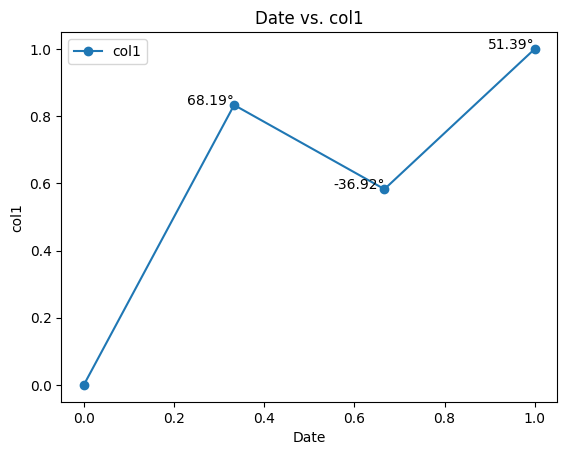

Theta between point 0 and 1: 68.19°
Theta between point 1 and 2: -36.92°
Theta between point 2 and 3: 51.39°


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Date': [str(date) for date in pd.date_range(start='2023-01-01', periods=4, freq='M')],
    'col1': [1, 500, 350, 600]
}


df = pd.DataFrame(data)

#convert date column to month number
df['Date'] = pd.to_datetime(df['Date']).dt.month


#min max scaling
df['col1'] = (df['col1'] - df['col1'].min()) / (df['col1'].max() - df['col1'].min())
df['Date'] = (df['Date'] - df['Date'].min()) / (df['Date'].max() - df['Date'].min())
print(df)


# # Convert Date to the difference in days from the first date for calculation
# Calculate differences in x (days) and y (col1 values)
dx = np.diff(df['Date'])
dy = np.diff(df['col1'])

print(dx)
print(dy)
# Calculate the angles in radians, then convert to degrees
theta = np.arctan2(dy, dx) * 180 / np.pi

# Plotting
df.plot(x='Date', y='col1', kind='line', marker='o')
plt.title('Date vs. col1')
plt.xlabel('Date')
plt.ylabel('col1')

# Show the angles between points
for i, angle in enumerate(theta):
    plt.text(df['Date'].iloc[i+1], df['col1'].iloc[i+1], f'{angle:.2f}°', fontsize=10, ha='right')

# Display the plot
plt.show()

# Display theta values
for i, angle in enumerate(theta):
    print(f'Theta between point {i} and {i+1}: {angle:.2f}°')


In [52]:
# Min max: 0, threshold

In [53]:
# min-max: 0, 1
# max :  min/max, 1

## Deep dive into a suggestion

Display above suggestions in frontend then wait till user clicks on one of the suggestions

In [288]:
#Main.py
def deep_dive_into_suggestion(index):
    #Assuming we get index from frontend
    selected_suggestion_info = suggestions[index]['Filters Info']
    metric = selected_suggestion_info['Metric']
    # print(selected_suggestion_info)
    trig_check_cols = Global_Checks[metric]['Trigger Check Columns'][selected_suggestion_info['Trend']]
    date_col = [val['GMD Name'] for val in meta_data['dimensions'].values() if val['GMD Name'] == 'Date'][0]
    if date_col in selected_suggestion_info['Associated df'].columns:
        dates = selected_suggestion_info['Associated df'][date_col].to_list()

    responses2 = {}
    backend_info_for_actions = {}
    for col in trig_check_cols:
        #traverse through threshold dictionary to get threshold

        # threshold = Global_Checks[col]['thresholds']
        # for filter_var in selected_suggestion_info['Filter_Variables'].values():
        #     threshold = threshold[filter_var.lower()]
        filters  =  selected_suggestion_info['Filter_Variables']
        filters[date_col]  =  dates
        suggest2 = get_suggestions(resdf, graph, col, user_input, list_of_nodes, metric_list, dimension_values, dimension_data, dimension_list, list_of_columns_to_be_present_for_trigger_check, list_of_column_checks, filters = filters)
        responses2[col] = suggest2
        # if suggest2:
        #     backend_info_for_actions[metric] = {'Trend': selected_suggestion_info['Trend'],
        #                                         'Triggers': {col: suggest2[col]}}
    return responses2   

In [289]:
deep_dive_into_suggestion(0)

['2024-06-01']
  Partner Name Region        Date   WOS
0      Bestbuy   West  2024-06-01  2733


{'week of supply': {0: {'Suggestion': "Found WOS pattern for ('Bestbuy', 'West'), please click here to get more info",
   'Filters Info': {'Trend': 'Down',
    'Metric': 'WOS',
    'Filter_Variables': {'Partner Name': ['Bestbuy'], 'Region': ['West']},
    'Associated df':   Partner Name Region        Date   WOS
    0      Bestbuy   West  2024-06-01  2733}}}}

In [ ]:
from server.src.Insight_logic.trigger_actions import ACTION_DICT as action_dict
from server.src.Insight_logic.trigger_actions import *

In [ ]:
overall_response = {}
for check in to_be_checked:
    if check in metric_list and check in company_checks:
        responses = {}
        base_resp = None
        temp_df = df[df[check].notna()]
        
        temp1df = df[(temp_df[check] >= company_checks[check]['threshold'][0])]  # +ive check
        temp2_df = df[(temp_df[check] <= company_checks[check]['threshold'][1])]  # -ive check
        
        if not temp1df.empty and not temp2_df.empty:
            # responses[check]=company_checks[check]['Response'][2]
            if 'Date' in temp1df.columns and 'Date' in temp2_df.columns:
                #which date is latest
                if temp1df['Date'].max() > temp2_df['Date'].max():
                    base_resp= 'Up'
                    thres_df= temp1df
                else:
                    base_resp= 'Down'
                    thres_df= temp2_df
            else:
                # base_resp=company_checks[check]['Response'][2]
                continue
        
        elif not temp1df.empty and temp2_df.empty:
            # responses.append(company_checks[check]['Response'][0])
            base_resp='Up'
            thres_df= temp1df
        
        elif temp1df.empty and not temp2_df.empty:
            # responses.append(company_checks[check]['Response'][1])
            base_resp='Down'
            thres_df= temp2_df
        
        if base_resp and base_resp in company_checks[check]['Trigger Check Columns'].keys():
            
            #Trigger an alert
            print(base_resp)
        
            trigger_check_cols = company_checks[check]['Trigger Check Columns'][base_resp]
            # list_of_nodes = list(set(list_of_nodes))
            
            temp_list_of_paths = find_partial_edge_attributes(graph, trigger_check_cols + list_of_nodes)
            
            # print(list_of_nodes)
            unfiltered_check_df, _, _, _ = fetch_required_data_and_apply_filters(temp_list_of_paths, user_input, metric_list, dimension_values, dimension_list)
            
            if dimension_data:
                exclusions, inclusions = separate_exception_entities(user_input, dimension_values)
                check_df = filter_values_handler(dimension_data, inclusions, exclusions, unfiltered_check_df)
                check_df = check_df.reset_index(drop=True)
            
            if check_df.empty:
                continue
            
            trig_check_col_resp = {}

            for trigger_check_item in company_checks[check]['Trigger Check Columns'][base_resp]:

                if trigger_check_item in check_df.columns:
                    trg_pos_check = check_df[(check_df[trigger_check_item] >= company_checks[trigger_check_item]['threshold'][0]) & (check_df[trigger_check_item].notna())] 
                    trg_neg_check = check_df[(check_df[trigger_check_item] <= company_checks[trigger_check_item]['threshold'][1]) & (check_df[trigger_check_item].notna())]
                    
                    if not trg_pos_check.empty and not trg_neg_check.empty:
                        #Place holder
                        # continue
                        # responses.append(company_checks[trigger_check_item]['Response'][2])
                        responses[trigger_check_item]='Both'


                    elif not trg_pos_check.empty and trg_neg_check.empty:
                        # responses.append(company_checks[trigger_check_item]['Response'][0])
                        responses[trigger_check_item]='Up'
                        trig_check_col_resp[trigger_check_item] = trg_pos_check

                    elif trg_pos_check.empty and not trg_neg_check.empty:
                        # responses.append(company_checks[trigger_check_item]['Response'][1])
                        responses[trigger_check_item]='Down'
                        trig_check_col_resp[trigger_check_item] = trg_neg_check

            overall_response[check] = {
                'Base_response': base_resp,
                'Responses': responses,
                'Trigger Check Columns': trig_check_col_resp,
                'Base df' : check_df,
                'Threshold Reached df': thres_df 
                               }
            print(responses)
            # print('Unfiltered df ', unfiltered_check_df)
            # Response Actions
            base_chek_resp = action_dict[check][base_resp]

overall_response

Up
{'WOS': 'Down'}


{'Sales': {'Base_response': 'Up',
  'Responses': {'WOS': 'Down'},
  'Trigger Check Columns': {'WOS':              City          Territory       State Region Partner Name  \
   0     Anton Chico          Guadalupe  New Mexico   West      Bestbuy   
   1     Anton Chico          Guadalupe  New Mexico   West      Bestbuy   
   2     Anton Chico          Guadalupe  New Mexico   West      Bestbuy   
   3     Anton Chico          Guadalupe  New Mexico   West      Bestbuy   
   4     Anton Chico          Guadalupe  New Mexico   West      Bestbuy   
   5     Anton Chico          Guadalupe  New Mexico   West      Bestbuy   
   6          Conner            Ravalli     Montana   West      Bestbuy   
   7          Conner            Ravalli     Montana   West      Bestbuy   
   8          Conner            Ravalli     Montana   West      Bestbuy   
   9          Conner            Ravalli     Montana   West      Bestbuy   
   10         Conner            Ravalli     Montana   West      Bestbuy   
  

In [ ]:
def action_taker(overall_responsem, action_dict):
    output_suggestions = {}
    for check in overall_response:
        base_resp = overall_response[check]['Base_response']
        for key, value in overall_response[check]['Responses'].items():

            base_check_resp = action_dict[check][base_resp]
            
            if key in base_check_resp.keys():
                res = base_check_resp[key][value](df=unfiltered_check_df, dimension_data=dimension_data, exclusions = exclusions, inclusions = inclusions, meta_data = meta_data)
                print(res)
                if not key in output_suggestions.keys():
                    output_suggestions[check+ ' ' + base_resp] = {key + ' ' + value: res}
                else:
                    output_suggestions[check + ' ' + base_resp][key + ' ' + value] = res
    return output_suggestions

res = action_taker(overall_response, action_dict)

West
          City Territory State Region Partner Name  \
660  Beaverdam     Allen  Ohio  South      Bestbuy   

                          Store Name        Date  Sales  WOS  
660  Bestbuy,Beaverdam,Allen,Ohio,US  2024-01-01    334  798  


In [ ]:
res.keys()

dict_keys(['Sales Up'])

In [ ]:
res['Sales Up']['WOS Down']

,City,Territory,State,Region,Partner Name,Store Name,Date,Sales,WOS
660,Beaverdam,Allen,Ohio,South,Bestbuy,"Bestbuy,Beaverdam,Allen,Ohio,US",2024-01-01,334,798


In [ ]:
res

{'Sales Up': {'WOS Down':           City Territory State Region Partner Name  \
  660  Beaverdam     Allen  Ohio  South      Bestbuy   
  
                            Store Name        Date  Sales  WOS  
  660  Bestbuy,Beaverdam,Allen,Ohio,US  2024-01-01    334  798  }}

# If not Trigger checks :-  does aggregation and applies grouby and sorting

In [40]:
df = df[list_of_nodes]


In [41]:
# if date_node:
#     df = df[df[date_node[0]].notna()]
#     df[date_node[0]] = pd.to_datetime(df['Date'], format="%Y-%m-%d", errors='coerce')
#     #filter by start and end date
#     df = df[(df[date_node[0]] >= start_date) & (df[date_node[0]] <= end_date)]
#     list_to_groupby.append(date_node)

In [42]:
df

,Product Name
0,Asus Zenbook
1,Asus TUF Gaming
2,HP Envy x360
3,Samsung Galaxybook
4,Microsoft Surface Pro
5,Apple Macbook Pro
6,Lenovo Legion
7,Lenovo Yoga
8,Acer Aspire


In [43]:
#Grouping, comparisons and aggregation
if list_to_groupby:
    list_to_groupby = list(set(list_to_groupby))
    #check if any column is numeric and not date, object or string
    numeric_columns = df.select_dtypes(include=[int, float]) \
                    .columns.difference(df.select_dtypes(include=['datetime', 'object', 'string']).columns)
    
    if not numeric_columns.empty:
        #if user defines an aggregation, use it
        if aggregations:
            #Assumption: if an entity say sales is asked in query then it is only asked like  sales >/</= 5000 or avg/agg sales </>/= 5000
            # not like avg sales where sales are greater than 5000 
            
            for col in df.columns:
                if col not in aggregations and col in numeric_columns:
                    aggregations[col] = 'sum'
            df = df.groupby(list_to_groupby).agg(aggregations).reset_index()

            if after_comp:
                df = comparison_handler(after_comp, df)
                
        else:
            #else use sum as default
            df = df.groupby(list_to_groupby).sum().reset_index()
    else:
        #if there are no numeric columns then take first from groupby
        print('No numeric present')
        print(df)
        df = df.groupby(list_to_groupby).first().reset_index()
else:
    # df = df.sum().reset_index()
    numeric_columns = df.select_dtypes(include=[int, float]) \
                    .columns.difference(df.select_dtypes(include=['datetime', 'object', 'string']).columns)
    rem_cols = list(df.columns.difference(numeric_columns))
    

    if not numeric_columns.empty:
        #if user defines an aggregation, use it
        if aggregations:
            #Assumption: if an entity say sales is asked in query then it is only asked like  sales >/</= 5000 or avg/agg sales </>/= 5000
            # not like avg sales where sales are greater than 5000 
            
            for col in df.columns:
                if col not in aggregations and col in numeric_columns:
                    aggregations[col] = 'sum'
            if rem_cols:
                df = df.groupby(rem_cols).agg(aggregations).reset_index()
            else:
                df = df.agg(aggregations).reset_index()

            if after_comp:
                df = comparison_handler(after_comp, df)
                
        else:
            #else use sum as default
            if rem_cols:
                df = df.groupby(rem_cols).sum().reset_index()
            else:
                # df = df.sum().reset_index()
                # df = df.agg({col: 'sum' for col in df.columns if col != 'index'}).reset_index(drop=True)
                df = df.agg(['sum']).reset_index(drop=True)
df

No numeric present
            Product Name
0           Asus Zenbook
1        Asus TUF Gaming
2           HP Envy x360
3     Samsung Galaxybook
4  Microsoft Surface Pro
5      Apple Macbook Pro
6          Lenovo Legion
7            Lenovo Yoga
8            Acer Aspire


,Product Name
0,Acer Aspire
1,Apple Macbook Pro
2,Asus TUF Gaming
3,Asus Zenbook
4,HP Envy x360
5,Lenovo Legion
6,Lenovo Yoga
7,Microsoft Surface Pro
8,Samsung Galaxybook


In [179]:
# user_input = 'What are all partner in descending order'

In [200]:
#sorting and giving top or bottom n if asked
top_or_bottom_n = extract_top_or_bottom_n(user_input)

df = df.sort_values(by = list(metric_list.keys())).reset_index(drop=True)

if top_or_bottom_n:
    # if top_or_bottom_n[0]=='top':
    #     df = df.sort_values(by = list(metric_list.keys())).reset_index(drop=True)
    if top_or_bottom_n[0]=='bottom':
        if metric_list:
            df = df.sort_values(by = list(metric_list.keys()), ascending=False).reset_index(drop=True)
        else:
            df = df.sort_values(by = list(df.columns), ascending=False).reset_index(drop=True)
    if top_or_bottom_n[1] is None:
        top_or_bottom_n[1] = len(df)
    df = df.head(top_or_bottom_n[1]).reset_index(drop=True)
df

,Partner Name,Region
0,Bestbuy,Midwest


In [159]:
my_dict = {'a': 1, 'b': 2, 'c': 3}
removed_value = {}
# Remove a key-value pair if the key exists
key_to_remove = 'b'
removed_value[key_to_remove] = my_dict.pop(key_to_remove, None)

print(my_dict)  # Output will be {'a': 1, 'c': 3}


{'a': 1, 'c': 3}


In [141]:
top_or_bottom_n

['bottom', 5]

# Why Logic

In [207]:
user_input = 'How are sales so high in bestbuy in west region'

In [208]:
def identify_why(user_input):
    why_regex = r'\b(?:why|how)\b|\b(?:what)\b.*(?:happened|occurred|caused|made|the reason)'
    why_regex = re.compile(why_regex, re.IGNORECASE)
    why_res = re.findall(why_regex, user_input)
    if why_res:
        return True
    return False

identify_why(user_input)

True

In [209]:
def identify_trend_in_query(user_input):
    # trend_regex = r'\b(?:high|low|increasing|decreasing|up|down|incrementing|reduced)\b'
    up_trend_regex= r'\b(?:highe?r?s?t?|increase?s?i?n?g?s?|up|incrementi?n?g?s?)\b'
    down_trend_regex = r'\b(?:lowe?r?s?t?|decrease?i?n?g?s?|down|reduce?d?i?n?g?s?|decrements?i?n?g?)\b'

    up_trend_res = re.findall(up_trend_regex, user_input)
    down_trend_res = re.findall(down_trend_regex, user_input)
    if up_trend_res:
        return 'Up'
    if down_trend_res:
        return 'Down'

trend = identify_trend_in_query(user_input)

In [210]:
metric_list = fetch_for_metric(user_input)
metric_list

{'Sales': ['sales', 'sales?']}

In [211]:
dimension_data, dimension_values = fetch_for_specific_dimension(user_input)
dimension_data, dimension_values

({'Region': {'Value': ['West']}, 'Partner Name': {'Value': ['Bestbuy']}},
 ['West', 'Bestbuy'])

In [212]:
dimension_list = fetch_for_dimension_name(user_input)
dimension_list

{'Region': ['region']}

In [213]:
list_of_nodes = list(set(list(metric_list.keys()) + list(dimension_list.keys()) + list(dimension_data.keys())))
list_of_nodes

['Sales', 'Partner Name', 'Region']

In [214]:
list_of_paths = find_edge_attributes_with_indirect_connections(graph, list_of_nodes)
list_of_paths

['Dummy_data_wos_sales.csv']

In [215]:
from src.Utils.Config import DATA_FOLDER

dfs = [pd.read_csv(os.path.join('src/', DATA_FOLDER, file_name)) for file_name in list_of_paths]

#Outerjoin on common columns
df, _ = outer_join_all_columns(dfs)
df

,City,Territory,State,Region,Partner Name,Store Name,Date,Sales,WOS
0,Alberton,Mineral,Montana,West,Target,"Target,Alberton,Mineral,Montana,US",2024-01-01,209,706
1,Alberton,Mineral,Montana,West,Target,"Target,Alberton,Mineral,Montana,US",2024-02-01,214,661
2,Alberton,Mineral,Montana,West,Target,"Target,Alberton,Mineral,Montana,US",2024-03-01,223,548
3,Alberton,Mineral,Montana,West,Target,"Target,Alberton,Mineral,Montana,US",2024-04-01,277,518
4,Alberton,Mineral,Montana,West,Target,"Target,Alberton,Mineral,Montana,US",2024-05-01,722,291
...,...,...,...,...,...,...,...,...,...
1195,Winthrop,Suffolk,Massachusetts,West,Target,"Target,Winthrop,Suffolk,Massachusetts,US",2024-02-01,374,772
1196,Winthrop,Suffolk,Massachusetts,West,Target,"Target,Winthrop,Suffolk,Massachusetts,US",2024-03-01,495,731
1197,Winthrop,Suffolk,Massachusetts,West,Target,"Target,Winthrop,Suffolk,Massachusetts,US",2024-04-01,516,623
1198,Winthrop,Suffolk,Massachusetts,West,Target,"Target,Winthrop,Suffolk,Massachusetts,US",2024-05-01,539,559


In [216]:
fetched_columns = df.columns.to_list()

fetched_columns

['City',
 'Territory',
 'State',
 'Region',
 'Partner Name',
 'Store Name',
 'Date',
 'Sales',
 'WOS']

Have the user select columns he wants from above that he is interested in () we displays columns with specified value as filled in it as we have been given through query

In [217]:
user_selected = ['City', 'Territory', 'State', 'Region', 'Partner Name', 'Date']
user_selected_gmd_names = [val['GMD Name'] for key, val in meta_data['dimensions'].items() if (key in user_selected)]


In [218]:
filters = {key :val['Value'] for key, val in dimension_data.items()}
filters

{'Region': ['West'], 'Partner Name': ['Bestbuy']}

In [219]:
from src.Insight_logic.suggestions_config import GLOBAL_COLUMNS_LIST_FOR_METRIC_THRESHOLD_CHECKS

In [227]:
set(req_cols_for_combo_check) - set(user_selected_gmd_names)

set()

In [220]:

##
from src.Insight_logic.why_logic.cause_and_effect import GLOBAL_CAUSES


checks = GLOBAL_CAUSES[[key for key, val in meta_data['metric'].items() if val['GMD Name'] == 'Sales' and key in metric_list][0]][trend]
checks

{'Traffic': 'Positive'}

In [233]:
results = {}
for check, correlation in checks.items():

    list_of_columns_to_be_present_for_trigger_check, list_of_column_checks = GLOBAL_COLUMNS_LIST_FOR_METRIC_THRESHOLD_CHECKS[check]
    #check if 
    if list(set(list_of_columns_to_be_present_for_trigger_check) - set(user_selected_gmd_names)) or list(set(list_of_column_checks) - set(user_selected_gmd_names)):
        print(list(set(list_of_columns_to_be_present_for_trigger_check) - set(user_selected_gmd_names)))
        print(list(set(list_of_column_checks) - set(user_selected_gmd_names)))
        
        continue
    
    suggestions = get_suggestions(pd.DataFrame(), graph, 'Traffic', user_input, list_of_nodes, metric_list, dimension_values, dimension_data, dimension_list, list_of_columns_to_be_present_for_trigger_check, list_of_column_checks, filters)
    if not suggestions or not suggestions[0]['Filters Info']:
        #Theta checking
        suggestions = do_theta_threshold_checks(check, list_of_columns_to_be_present_for_trigger_check, list_of_column_checks, pd.DataFrame())
    if any([suggestions[i]['Filters Info']['Trend']==trend for i in range(len(suggestions))]):
        results[check] = suggestions

     Ice Id  Store Id        Date  Week Partner Name    Traffic  \
0         9         9  2024-01-01  37.0      Bestbuy  7088864.0   
1         9         9  2024-01-01  37.0      Bestbuy  7088864.0   
2         9         9  2024-01-01  37.0      Bestbuy  7088864.0   
3         9         9  2024-01-01  37.0      Bestbuy  7088864.0   
4         9         9  2024-01-01  37.0      Bestbuy  7088864.0   
..      ...       ...         ...   ...          ...        ...   
615     292       292  2024-06-01  32.0      Bestbuy  9859712.0   
616     292       292  2024-06-01  32.0      Bestbuy  9859712.0   
617     292       292  2024-06-01  32.0      Bestbuy  9859712.0   
618     292       292  2024-06-01  32.0      Bestbuy  9859712.0   
619     292       292  2024-06-01  32.0      Bestbuy  9859712.0   

               Price Segment Brand Product Name Launch Date  ...  \
0    Budget Friendly Segment  Acer  Acer Aspire  2024-02-04  ...   
1    Budget Friendly Segment  Acer  Acer Aspire  2024-02-04

In [234]:
results

{'Traffic': {0: {'Suggestion': "Found Traffic pattern for ('Bestbuy', 'West'), please click here to get more info",
   'Filters Info': {'Trend': 'Up',
    'Metric': 'Traffic',
    'Filter_Variables': {'Partner Name': ['Bestbuy'], 'Region': ['West']},
    'Associated df':   Partner Name Region Launch Date     Traffic
    0      Bestbuy   West  2024-02-04  70888640.0}}}}

# Ignore

In [ ]:
list_of_paths

In [ ]:
dfs = [pd.read_csv(f'test_data_19_Aug/{path}', ) for path in list_of_paths]
# merged_df = pd.DataFrame()

#Outerjoin on common columns
merged_df = outer_join_all_columns(dfs)
# filter_cols = list(set(list(merged_df)) - set(list_of_nodes))
# subset_df = merged_df[list_of_nodes]

In [ ]:
merged_df

In [ ]:
# dfs[1]

In [ ]:
merged_df

In [ ]:
# subset_df

In [ ]:
# df = merged_df.copy()

In [ ]:
# df

In [ ]:
exclusions, inclusions = separate_exception_entities(user_input, dimension_values)
print('Exclusions: ', exclusions)
print('inclusions: ', inclusions)

In [ ]:
# dimension_values

In [ ]:
col_w_regex = {key: metric_list.get(key, []) + dimension_list.get(key, []) for key in metric_list.keys() | dimension_list.keys()}

col_w_regex

In [ ]:
aggregations = extract_aggregations(user_input, col_w_regex)
aggregations

In [ ]:
comparisons = extract_comparisons(user_input, col_w_regex)
comparisons

In [ ]:
if comparisons:
    df = comparison_handler(comparisons, df)
df

In [ ]:
dimension_values

In [ ]:
# filters = {}
list_to_groupby = []

#Cases: If dimension Data is present in query, then filter df for those values
if dimension_data:
    exclusions, inclusions = separate_exception_entities(user_input, dimension_values)
    df = filter_values_handler(dimension_data, inclusions, exclusions, df)
    list_to_groupby+= list(dimension_data.keys())
if dimension_list:
    list_to_groupby+= dimension_list
df

In [ ]:
comparisons

In [ ]:
after_comp =[]
before_comp = []
if aggregations:
    #Assumption: if an entity say sales is asked in query then it is only asked like  sales >/</= 5000 or avg/agg sales </>/= 5000
    # not like avg sales where sales are greater than 5000 
    for comp in comparisons:
        if comp[0] in aggregations:
            after_comp.append(comp)
        else:
            before_comp.append(comp)
    
else:
    before_comp = comparisons

if before_comp:
    df = comparison_handler(before_comp, df)


In [ ]:
# aggregations

In [ ]:
# metric_list

In [ ]:
# sales_threshold = 92170.0
# sales_triger_check_cols = ['Traffic']

# if 'Sales' in metric_list:
#     tempdf = df[df['Sales'] >= sales_threshold]
#     if not tempdf.empty:
#         #Trigger an alert
#         list_of_nodes += sales_triger_check_cols
        

In [ ]:
#Columns Filter
df = df[list_of_nodes]
df

In [ ]:
#Grouping, comparisons and aggregation
if list_to_groupby:
    list_to_groupby = list(set(list_to_groupby))
    #check if any column is numeric and not date, object or string
    numeric_columns = df.select_dtypes(include=[int, float]) \
                    .columns.difference(df.select_dtypes(include=['datetime', 'object', 'string']).columns)
    
    if not numeric_columns.empty:
        #if user defines an aggregation, use it
        if aggregations:
            #Assumption: if an entity say sales is asked in query then it is only asked like  sales >/</= 5000 or avg/agg sales </>/= 5000
            # not like avg sales where sales are greater than 5000 
            
            for col in df.columns:
                if col not in aggregations and col in numeric_columns:
                    aggregations[col] = 'sum'
            df = df.groupby(list_to_groupby).agg(aggregations).reset_index()

            if after_comp:
                df = comparison_handler(after_comp, df)
                
        else:
            #else use sum as default
            df = df.groupby(list_to_groupby).sum().reset_index()
    else:
        #if there are no numeric columns then take first from groupby
        print('No numeric present')
        print(df)
        df = df.groupby(list_to_groupby).first().reset_index()
df

In [ ]:
#sorting and giving top or bottom n if asked
top_or_bottom_n = extract_top_or_bottom_n(user_input)

df = df.sort_values(by = list(metric_list.keys())).reset_index(drop=True)

if top_or_bottom_n:
    # if top_or_bottom_n[0]=='top':
    #     df = df.sort_values(by = list(metric_list.keys())).reset_index(drop=True)
    if top_or_bottom_n[0]=='bottom':
        df = df.sort_values(by = list(metric_list.keys()), ascending=False).reset_index(drop=True)
    if top_or_bottom_n[1] is None:
        top_or_bottom_n[1] = len(df)
    df = df.head(top_or_bottom_n[1]).reset_index(drop=True)
df

In [ ]:
top_or_bottom_n